#### Notebook generates statistics for IWP retrievals(test data), Used for Fig. 11

In [71]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from iwc2tb.GMI.gmiData_test import gmiData
import os
from iwc2tb.GMI.three_sigma_rule import three_sigma
from matplotlib import cm
import pandas as pd
plt.rcParams.update({'font.size': 20})

In [72]:

np.linspace(0.01, 0.99, 50)

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43,
       0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65,
       0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87,
       0.89, 0.91, 0.93, 0.95, 0.97, 0.99])

In [73]:
quantiles         = np.linspace(0.01, 0.99, 50)
imedian            = np.argwhere((quantiles >= 0.49) & (quantiles < 0.51))[0][0]
alist      = ["0", "1", "2", "3" ] 
alist      = ["0"]

In [4]:
AY      = []
AY_pre  = []
AY_mean = []
PR      = []
for i in alist:
    
    filename_aro = "qrnn_gmi_nn_lpa_v" + i + "_jan_v.pickle"

    with open(filename_aro, "rb") as f:   
        ay      = pickle.load(f)
        ay_pre  = pickle.load(f)
        ay_mean = pickle.load(f)
        pr      = pickle.load(f)

        f.close()
        
    AY.append(ay)
    AY_pre.append(ay_pre.reshape(-1, 1, 50))
    AY_mean.append(ay_mean.reshape(-1, 1))
    PR.append(pr)

AY      = np.concatenate(AY, axis = 1)
AY_pre  = np.concatenate(AY_pre, axis = 1)
AY_mean = np.concatenate(AY_mean, axis = 1)
PR      = np.concatenate(PR, axis = 1)

    

In [5]:
TY      = []
TY_pre  = []
TY_mean = []

for i in alist:
    
    filename_aro = "qrnn_gmi_nn_lpa_pr1_v" + i + "_jan.pickle" 

    with open(filename_aro, "rb") as f:   
        ty      = pickle.load(f)
        ty_pre  = pickle.load(f)
        ty_mean = pickle.load(f)
        pr      = pickle.load(f)

        f.close()
        
    TY.append(ty)
    TY_pre.append(ty_pre.reshape(-1, 1, 50))
    TY_mean.append(ty_mean.reshape(-1, 1))


TY      = np.concatenate(TY, axis = 1)
TY_pre  = np.concatenate(TY_pre, axis = 1)
TY_mean = np.concatenate(TY_mean, axis = 1)


In [6]:
AY_mean.shape

(1681625, 1)

In [7]:
def below_threshold(AY, AY_mean):
    AY[AY < 1e-4] = 1e-4
    AY_mean[AY_mean < 1e-4] = 1e-4
    return AY, AY_mean


In [8]:
AV      = []
AV_pre  = []
AV_mean = []

for i in alist:
    
    filename_aro = "qrnn_gmi_nn_lpa_v" + i + "_jan_v.pickle" 

    with open(filename_aro, "rb") as f:   
        ty      = pickle.load(f)
        ty_pre  = pickle.load(f)
        ty_mean = pickle.load(f)
        pr      = pickle.load(f)

        f.close()
        
    AV.append(ty)
    AV_pre.append(ty_pre.reshape(-1, 1, 50))
    AV_mean.append(ty_mean.reshape(-1, 1))


AV      = np.concatenate(AV, axis = 1)
AV_pre  = np.concatenate(AV_pre, axis = 1)
AV_mean = np.concatenate(AV_mean, axis = 1)

    
    
    

In [9]:
TV      = []
TV_pre  = []
TV_mean = []

for i in alist:
    
    filename_aro = "qrnn_gmi_nn_lpa_pr1_v" + i + "_jan_v.pickle"

    with open(filename_aro, "rb") as f:   
        ty      = pickle.load(f)
        ty_pre  = pickle.load(f)
        ty_mean = pickle.load(f)
        pr      = pickle.load(f)

        f.close()
        
    TV.append(ty)
    TV_pre.append(ty_pre.reshape(-1, 1, 50))
    TV_mean.append(ty_mean.reshape(-1, 1))


TV      = np.concatenate(TV, axis = 1)
TV_pre  = np.concatenate(TV_pre, axis = 1)
TV_mean = np.concatenate(TV_mean, axis = 1)

    
    
    

In [10]:
AY, AY_mean = below_threshold(AY, AY_mean)
TY, TY_mean = below_threshold(TY, TY_mean)

AV, AV_mean = below_threshold(AV, AV_mean)
TV, TV_mean = below_threshold(TV, TV_mean)

In [11]:
batchSize          = 256
inputs             = np.array( ["ta", "t2m",  "wvp", "z0", "lat",  "stype"])
outputs            = "iwp"
xlog               = True
latlims            = [0, 65]
test_data          = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_val_jan2010_withnoise.nc"), 
                             inputs,
                             outputs,
                             batch_size = batchSize,
                             latlims = latlims,
                             normalise = None,)
                             #log_iwp = xlog)


{0: (269.10403025848836, 20.643724295123526), 1: (265.5813243907264, 23.676942432447774), 2: (266.14956635600817, 14.274830795947793), 3: (257.70621073728125, 10.020893135911043), 4: (286.61770363132, 14.281002757198248), 5: (23.0027955926007, 16.823302635276093), 6: (169.73314260732718, 512.1075619128192), 7: (-1.5001814941685525, 37.62187709361819)}


In [12]:
lat = test_data.lat
lat = np.repeat(lat, AY.shape[1], axis = 1)
tb  = test_data.x[:, :4]
TB = np.repeat(tb.reshape(-1, 4, 1), AY.shape[1], axis = 2)


In [13]:
def plot_scatter(amask, figname = "scatter_tb.png"):
    fig, ax = plt.subplots(1, 2, figsize = [15, 6])
    ax = ax.ravel()
    ax[0].scatter(AY, AY_mean, color = "tab:blue", label = "all")
    cs = ax[1].scatter(TY, TY_mean, color = "tab:blue", label = "all")

    x = np.arange(0.0001, 15, 1)
    y = x

    ax[1].scatter(TY[amask], TY_mean[amask], color = "tab:red", alpha = 0.2, label = "subset")
    ax[0].scatter(AY[amask], AY_mean[amask], color = "tab:red", alpha = 0.2, label = "subset")
    ax[0].plot(x, y, "k")
    ax[1].plot(x, y, "k")
    ax[0].set_title("ARO based training")
    ax[1].set_title("TRO based training")
    ax[0].set_xlabel(r"IWP0 [kg m$^{-2}$]")
    ax[0].set_ylabel(r"IWP_mean [kg m$^{-2}$]")

    ax[1].set_xlabel(r"IWP0 [kg m$^{-2}$]")
    ax[1].set_ylabel(r"IWP_mean [kg m$^{-2}$]")
    ax[0].legend()
    ax[1].legend()
    ax[0].set_xlim([0, 20])
    ax[1].set_xlim([0, 20])
    ax[0].set_ylim([0, 20])
    ax[1].set_ylim([0, 20])

    #ax[1].set_yscale("log")
    #ax[1].set_xscale("log")
    #ax[0].set_yscale("log")
    #ax[0].set_xscale("log")
    fig.savefig(figname, bbox_inches = "tight", dpi = 300)

In [14]:
stype = test_data.stype
stype = np.argmax(stype, axis = 1)
stype = np.squeeze(stype)
stype

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
stype = np.repeat(stype.reshape(-1, 1), AY.shape[1], axis = 1)


In [16]:
def plot_scatter_mask(lsmmask, figname):
    fig, ax = plt.subplots(1, 2, figsize = [15, 6])
    ax = ax.ravel()

    x = np.arange(0.0001, 15, 1)
    y = x

    ax[1].scatter(ty[lsmmask], ty_mean[lsmmask], c = pr[lsmmask],
                  vmin = 1.2, vmax = 1.4, alpha = 0.5, label = "subset", cmap = cm.Blues)
    cs = ax[0].scatter(ay[lsmmask], ay_mean[lsmmask], c = pr[lsmmask], 
                       vmin = 1.2, vmax = 1.4, alpha = 0.5, label = "subset", cmap = cm.Blues)
    fig.colorbar(cs, ax = ax)
    ax[0].plot(x, y, "k")
    ax[1].plot(x, y, "k")
    ax[0].set_title("ARO based training")
    ax[1].set_title("TRO based training")
    ax[0].set_xlabel(r"IWP0 [kg m$^{-2}$]")
    ax[0].set_ylabel(r"IWP_mean [kg m$^{-2}$]")

    ax[1].set_xlabel(r"IWP0 [kg m$^{-2}$]")
    ax[1].set_ylabel(r"IWP_mean [kg m$^{-2}$]")
    #ax[0].legend()
    #ax[1].legend()
    ax[0].set_xlim([1e-4, 20])
    ax[1].set_xlim([1e-4, 20])
    ax[0].set_ylim([1e-4, 20])
    ax[1].set_ylim([1e-4, 20])

    #ax[1].set_yscale("log")
    #ax[1].set_xscale("log")
    #ax[0].set_yscale("log")
    #ax[0].set_xscale("log")
    fig.savefig(figname, bbox_inches = "tight", dpi = 300)

In [17]:
def bias(y, y0):
    return np.mean(y-y0)

def mae(y, y0):
    return np.mean(np.abs(y-y0))

def rmsd(y, y0):
    return np.sqrt(np.mean((y-y0)**2))
    



In [18]:
def stats(y, y0):
    
    bias = np.mean(y-y0)
    mae  = np.mean(np.abs(y-y0))
    rms  = np.sqrt(np.mean((y-y0)**2))
    std  = np.std(y - y0)
    mean = np.mean(y)
    
    return bias, mae, std, mean

In [19]:
def stats_dataframe(Y_mean, Y, PR, stype, TB):
    statistics_aro = np.zeros([8, 4])

    # all data
    statistics_aro[0, :] = stats(Y_mean, Y)
    
    # water
    amask = (stype == 0)
    statistics_aro[1, :] = stats(Y_mean[amask], Y[amask])

    # land
    amask = (stype == 1) 
    statistics_aro[2, :] = stats(Y_mean[amask], Y[amask])

    # snow 
    amask = (stype == 2) 
    statistics_aro[3, :] = stats(Y_mean[amask], Y[amask])

    # seaice
    amask = (stype == 3) 
    statistics_aro[4, :] = stats(Y_mean[amask], Y[amask])
    
    # coastlines
    amask = (stype == 4) 
    statistics_aro[5, :] = stats(Y_mean[amask], Y[amask])

    # snow+land boundary
    amask = (stype == 7)
    statistics_aro[6, :] = stats(Y_mean[amask], Y[amask])

    # water+seaice boundary 
    amask = (stype == 6) 
    statistics_aro[7, :] = stats(Y_mean[amask], Y[amask])



    statistics_aro = np.round(statistics_aro, decimals = 3)
    
    DF_aro = pd.DataFrame(statistics_aro, columns = ["Bias", "MAE", "RMSD", "Mean"], 
                  index = ["all","water", "land", "snow", "seaice", "coastlines", "snow/land boundary",
                           "seaice/water boundary"])
    
    return DF_aro
    


In [20]:
DF_AY = stats_dataframe(AY_mean, AY, PR, stype, TB[:, 0, :])
DF_TY = stats_dataframe(TY_mean, TY, PR, stype, TB[:, 0, :])

DF_AV = stats_dataframe(AV_mean, AV, PR, stype, TB[:, 0, :])
DF_TV = stats_dataframe(TV_mean, TV, PR, stype, TB[:, 0, :])

In [68]:
im = (lat >-65.) & (lat <= -45.) 
#im = np.abs(lat) <=30.0
#im = np.abs(lat) > 45.0
#im = (np.abs(lat) > 30.0) & (np.abs(lat) < 45.0)
#im = lat > 45
#im = (lat > 30) & (lat <= 45)
DF_AY_tr = stats_dataframe(AY_mean[im], AY[im], PR[im], stype[im], TB[:, 0, :][im])
DF_TY_tr = stats_dataframe(TY_mean[im], TY[im], PR[im], stype[im], TB[:, 0, :][im])

In [69]:
DF_AY_tr

,Bias,MAE,RMSD,Mean
all,-0.005,0.052,0.280,0.122
water,-0.004,0.050,0.275,0.119
land,-0.040,0.196,0.584,0.367
snow,-0.375,0.416,0.912,0.461
seaice,0.044,0.055,0.093,0.126
coastlines,-0.029,0.196,0.590,0.395
snow/land boundary,-0.332,0.390,0.619,0.783
seaice/water boundary,0.029,0.047,0.075,0.142


In [70]:
DF_TY_tr

,Bias,MAE,RMSD,Mean
all,-0.002,0.056,0.293,0.124
water,-0.001,0.054,0.288,0.122
land,-0.084,0.188,0.579,0.323
snow,-0.340,0.405,0.772,0.496
seaice,0.051,0.060,0.110,0.133
coastlines,-0.042,0.198,0.641,0.383
snow/land boundary,-0.365,0.414,0.638,0.749
seaice/water boundary,0.027,0.052,0.099,0.140


In [24]:
DF_AY

,Bias,MAE,RMSD,Mean
all,-0.005,0.037,0.244,0.106
water,-0.005,0.037,0.259,0.110
land,-0.003,0.030,0.182,0.107
snow,-0.002,0.044,0.203,0.071
seaice,0.016,0.044,0.119,0.073
coastlines,-0.015,0.056,0.312,0.144
snow/land boundary,-0.019,0.074,0.297,0.148
seaice/water boundary,0.009,0.059,0.154,0.090


In [25]:
DF_TY

,Bias,MAE,RMSD,Mean
all,0.006,0.044,0.275,0.117
water,0.006,0.044,0.291,0.122
land,0.011,0.038,0.225,0.120
snow,-0.002,0.045,0.205,0.071
seaice,0.033,0.059,0.237,0.090
coastlines,-0.002,0.065,0.380,0.157
snow/land boundary,-0.009,0.081,0.336,0.158
seaice/water boundary,0.021,0.072,0.253,0.103


In [26]:
(0.44 - 0.37)/0.37

0.1891891891891892

In [27]:
iwpmask = (AY > 0.01) & (AY < 0.5)
DF_AY_1 = stats_dataframe(AY_mean[iwpmask], AY[iwpmask], PR[iwpmask], stype[iwpmask], TB[:, 0, :][iwpmask])
DF_TY_1 = stats_dataframe(TY_mean[iwpmask], TY[iwpmask], PR[iwpmask], stype[iwpmask], TB[:, 0, :][iwpmask])
DF_AV_1 = stats_dataframe(AV_mean[iwpmask], AV[iwpmask], PR[iwpmask], stype[iwpmask], TB[:, 0, :][iwpmask])
DF_TV_1 = stats_dataframe(TV_mean[iwpmask], TV[iwpmask], PR[iwpmask], stype[iwpmask], TB[:, 0, :][iwpmask])

In [28]:
iwpmask = AY > 0.5
DF_AY_2 = stats_dataframe(AY_mean[iwpmask], AY[iwpmask], PR[iwpmask], stype[iwpmask], TB[:, 0, :][iwpmask])
DF_TY_2 = stats_dataframe(TY_mean[iwpmask], TY[iwpmask], PR[iwpmask], stype[iwpmask], TB[:, 0, :][iwpmask])
DF_AV_2 = stats_dataframe(AV_mean[iwpmask], AV[iwpmask], PR[iwpmask], stype[iwpmask], TB[:, 0, :][iwpmask])
DF_TV_2 = stats_dataframe(TV_mean[iwpmask], TV[iwpmask], PR[iwpmask], stype[iwpmask], TB[:, 0, :][iwpmask])

In [29]:
iwpmask = AY < 0.01
DF_AY_3 = stats_dataframe(AY_mean[iwpmask], AY[iwpmask], PR[iwpmask], stype[iwpmask], TB[:, 0, :][iwpmask])
DF_TY_3 = stats_dataframe(TY_mean[iwpmask], TY[iwpmask], PR[iwpmask], stype[iwpmask], TB[:, 0, :][iwpmask])
DF_AV_3 = stats_dataframe(AV_mean[iwpmask], AV[iwpmask], PR[iwpmask], stype[iwpmask], TB[:, 0, :][iwpmask])
DF_TV_3 = stats_dataframe(TV_mean[iwpmask], TV[iwpmask], PR[iwpmask], stype[iwpmask], TB[:, 0, :][iwpmask])

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


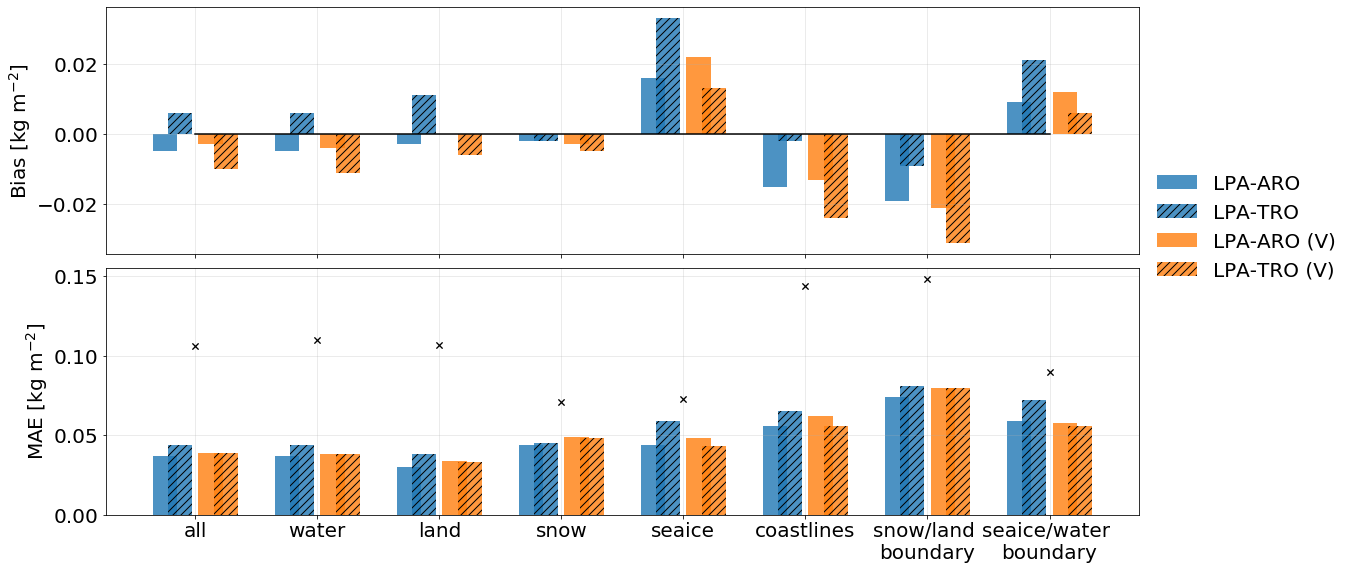

In [30]:
xx = np.arange(1, 9, 1)
fig, ax = plt.subplots(2, 1, figsize = [16, 8])
ax = ax.ravel()

for i, var in enumerate(["Bias", "MAE"]):
    ax[i].bar(xx - 0.25, DF_AY[var], width = 0.20, color = "tab:blue", alpha = 0.8, label = "LPA-ARO")
    ax[i].bar(xx - 0.125, DF_TY[var], width = 0.20, color = "tab:blue", hatch = "///", alpha = 0.8, label = "LPA-TRO")
    ax[i].bar(xx + 0.125, DF_AV[var], width = 0.20, color = "tab:orange", alpha = 0.8, label = "LPA-ARO (V)")
    ax[i].bar(xx + 0.25, DF_TV[var], width = 0.20, color = "tab:orange", hatch = "///", alpha = 0.8, label = "LPA-TRO (V)")
    ax[1].plot(xx, DF_AY["Mean"], 'x', c = "k")
    #ax[i].set_xlabel("Subsets")
    ax[i].set_ylabel(var + r" [kg m$^{-2}$]")
    plt.tight_layout(pad = 0.5)
    ax[i].set_xticks(xx)
    ax[i].grid("on", alpha = 0.3)
    ax[0].set_xticklabels([])
    ax[1].set_xticklabels(["all","water", "land", "snow", "seaice", "coastlines", "snow/land \n boundary",
                           "seaice/water \n boundary"], rotation = 0, wrap = True)
    ax[i].tick_params(axis='x', labelsize=20)
ax[1].legend(bbox_to_anchor=(1., 1.45), frameon = False)

xx == np.arange(-1, 11, 1)
yy = np.zeros([xx.size])
ax[0].plot(xx, yy, 'k')
#ax[1].set_ylim([0, 0.1])
#fig.suptitle("All data")
fig.savefig("ARO_TRO_v_vh.pdf", bbox_inches = "tight")

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


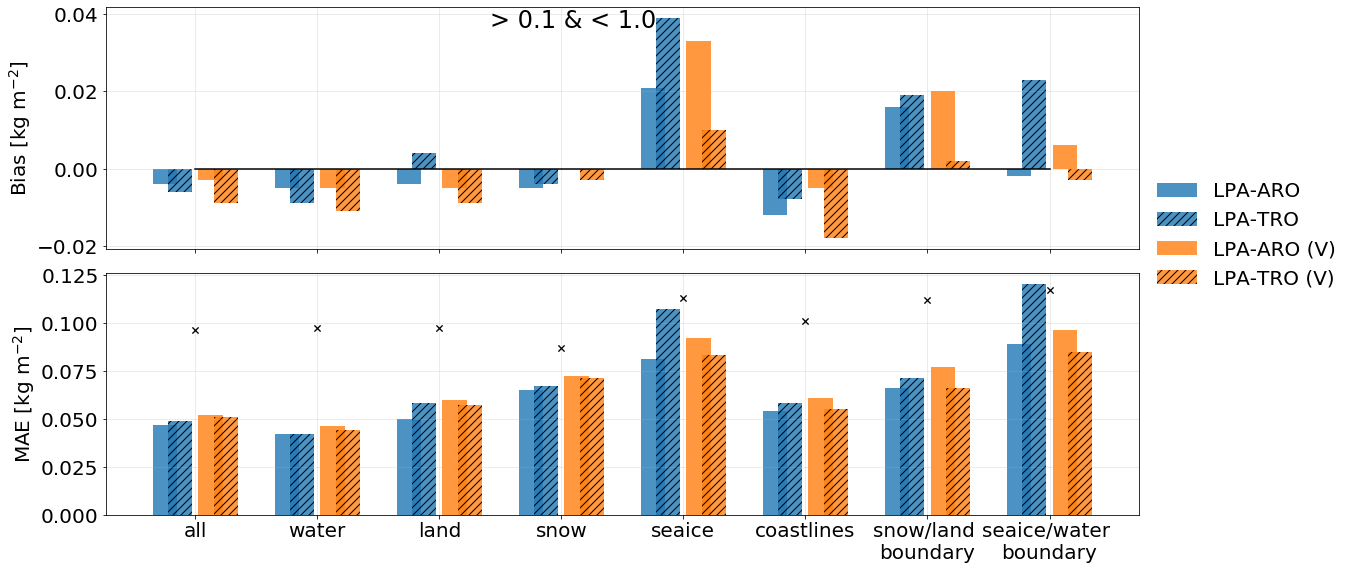

In [31]:
xx = np.arange(1, 9, 1)
fig, ax = plt.subplots(2, 1, figsize = [16, 8])
ax = ax.ravel()

for i, var in enumerate(["Bias", "MAE"]):
    ax[i].bar(xx - 0.25, DF_AY_1[var], width = 0.20, color = "tab:blue", alpha = 0.8, label = "LPA-ARO")
    ax[i].bar(xx - 0.125, DF_TY_1[var], width = 0.20, color = "tab:blue", hatch = "///", alpha = 0.8, label = "LPA-TRO")
    ax[i].bar(xx + 0.125, DF_AV_1[var], width = 0.20, color = "tab:orange", alpha = 0.8, label = "LPA-ARO (V)")
    ax[i].bar(xx + 0.25, DF_TV_1[var], width = 0.20, color = "tab:orange", hatch = "///", alpha = 0.8, label = "LPA-TRO (V)")
    ax[1].plot(xx, DF_AY_1["Mean"], 'x', c = "k")
    #ax[i].set_xlabel("Subsets")
    ax[i].set_ylabel(var + r" [kg m$^{-2}$]")
    plt.tight_layout(pad = 0.5)
    ax[i].set_xticks(xx)
    ax[i].grid("on", alpha = 0.3)
    ax[0].set_xticklabels([])
    ax[1].set_xticklabels(["all","water", "land", "snow", "seaice", "coastlines", "snow/land \n boundary",
                           "seaice/water \n boundary"], rotation = 0, wrap = True)
    ax[i].tick_params(axis='x', labelsize=20)
ax[1].legend(bbox_to_anchor=(1., 1.45), frameon = False)

xx == np.arange(-1, 11, 1)
yy = np.zeros([xx.size])
ax[0].plot(xx, yy, 'k')
#ax[1].set_ylim([0, 0.1])
fig.suptitle("> 0.1 & < 1.0")
fig.savefig("ARO_TRO_v_vh_1.pdf", bbox_inches = "tight")

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


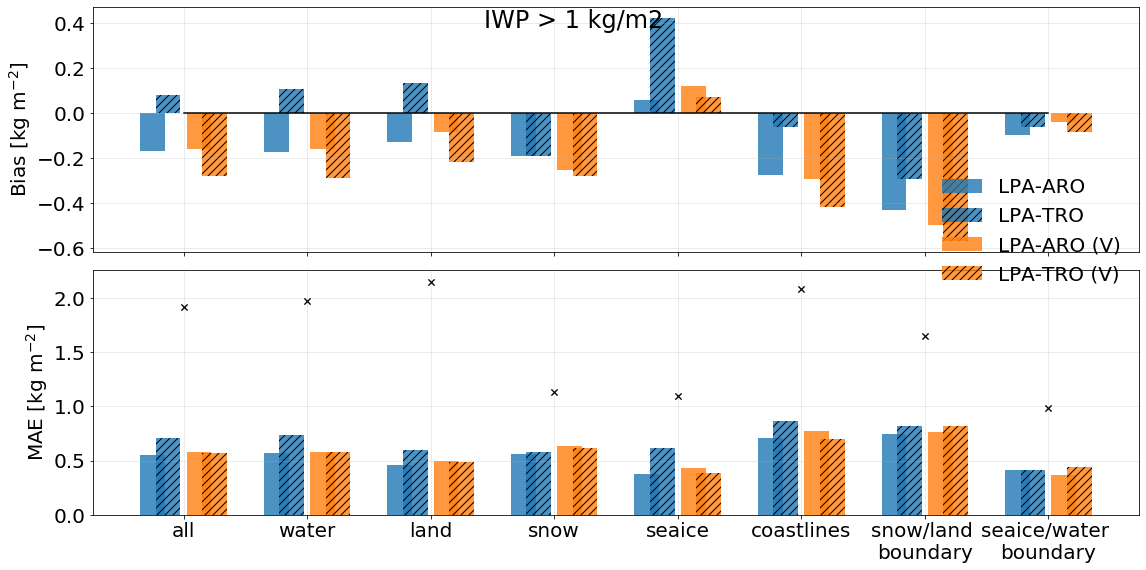

In [32]:
xx = np.arange(1, 9, 1)
fig, ax = plt.subplots(2, 1, figsize = [16, 8])
ax = ax.ravel()

for i, var in enumerate(["Bias", "MAE"]):
    ax[i].bar(xx - 0.25, DF_AY_2[var], width = 0.20, color = "tab:blue", alpha = 0.8, label = "LPA-ARO")
    ax[i].bar(xx - 0.125, DF_TY_2[var], width = 0.20, color = "tab:blue", hatch = "///", alpha = 0.8, label = "LPA-TRO")
    ax[i].bar(xx + 0.125, DF_AV_2[var], width = 0.20, color = "tab:orange", alpha = 0.8, label = "LPA-ARO (V)")
    ax[i].bar(xx + 0.25, DF_TV_2[var], width = 0.20, color = "tab:orange", hatch = "///", alpha = 0.8, label = "LPA-TRO (V)")
    ax[1].plot(xx, DF_AY_2["Mean"], 'x', c = "k")
    #ax[i].set_xlabel("Subsets")
    ax[i].set_ylabel(var + r" [kg m$^{-2}$]")
    plt.tight_layout(pad = 0.5)
    ax[i].set_xticks(xx)
    ax[i].grid("on", alpha = 0.3)
    ax[0].set_xticklabels([])
    ax[1].set_xticklabels(["all","water", "land", "snow", "seaice", "coastlines", "snow/land \n boundary",
                           "seaice/water \n boundary"], rotation = 0, wrap = True)
    ax[i].tick_params(axis='x', labelsize=20)
ax[1].legend(bbox_to_anchor=(1., 1.45), frameon = False)

xx == np.arange(-1, 11, 1)
yy = np.zeros([xx.size])
ax[0].plot(xx, yy, 'k')
#ax[1].set_ylim([0, 0.1])
#fig.suptitle("All data")
fig.savefig("ARO_TRO_v_vh.pdf", bbox_inches = "tight")
fig.suptitle("IWP > 1 kg/m2")
fig.savefig("ARO_lpa_esa_cloudy.pdf", bbox_inches = "tight")

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


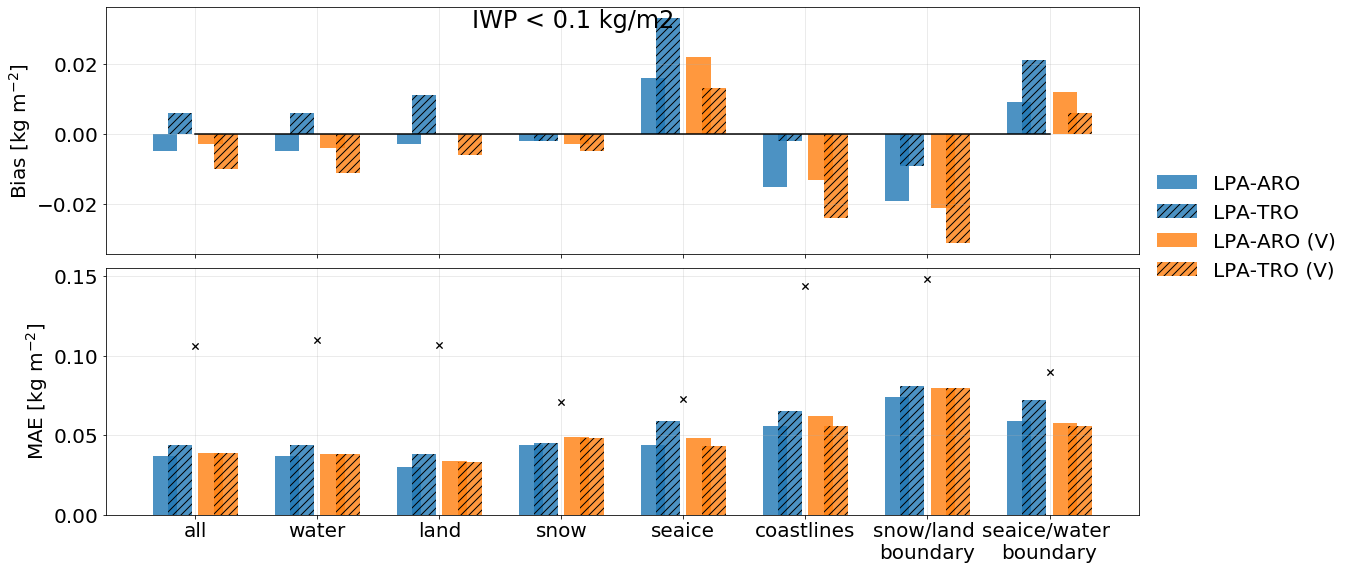

In [33]:
xx = np.arange(1, 9, 1)
fig, ax = plt.subplots(2, 1, figsize = [16, 8])
ax = ax.ravel()

for i, var in enumerate(["Bias", "MAE"]):
    ax[i].bar(xx - 0.25, DF_AY[var], width = 0.20, color = "tab:blue", alpha = 0.8, label = "LPA-ARO")
    ax[i].bar(xx - 0.125, DF_TY[var], width = 0.20, color = "tab:blue", hatch = "///", alpha = 0.8, label = "LPA-TRO")
    ax[i].bar(xx + 0.125, DF_AV[var], width = 0.20, color = "tab:orange", alpha = 0.8, label = "LPA-ARO (V)")
    ax[i].bar(xx + 0.25, DF_TV[var], width = 0.20, color = "tab:orange", hatch = "///", alpha = 0.8, label = "LPA-TRO (V)")
    ax[1].plot(xx, DF_AY["Mean"], 'x', c = "k")
    #ax[i].set_xlabel("Subsets")
    ax[i].set_ylabel(var + r" [kg m$^{-2}$]")
    plt.tight_layout(pad = 0.5)
    ax[i].set_xticks(xx)
    ax[i].grid("on", alpha = 0.3)
    ax[0].set_xticklabels([])
    ax[1].set_xticklabels(["all","water", "land", "snow", "seaice", "coastlines", "snow/land \n boundary",
                           "seaice/water \n boundary"], rotation = 0, wrap = True)
    ax[i].tick_params(axis='x', labelsize=20)
ax[1].legend(bbox_to_anchor=(1., 1.45), frameon = False)

xx == np.arange(-1, 11, 1)
yy = np.zeros([xx.size])
ax[0].plot(xx, yy, 'k')
#ax[1].set_ylim([0, 0.1])
#fig.suptitle("All data")
fig.savefig("ARO_TRO_v_vh.pdf", bbox_inches = "tight")
fig.suptitle("IWP < 0.1 kg/m2")
fig.savefig("ARO_lpa_esa_clear.pdf", bbox_inches = "tight")

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


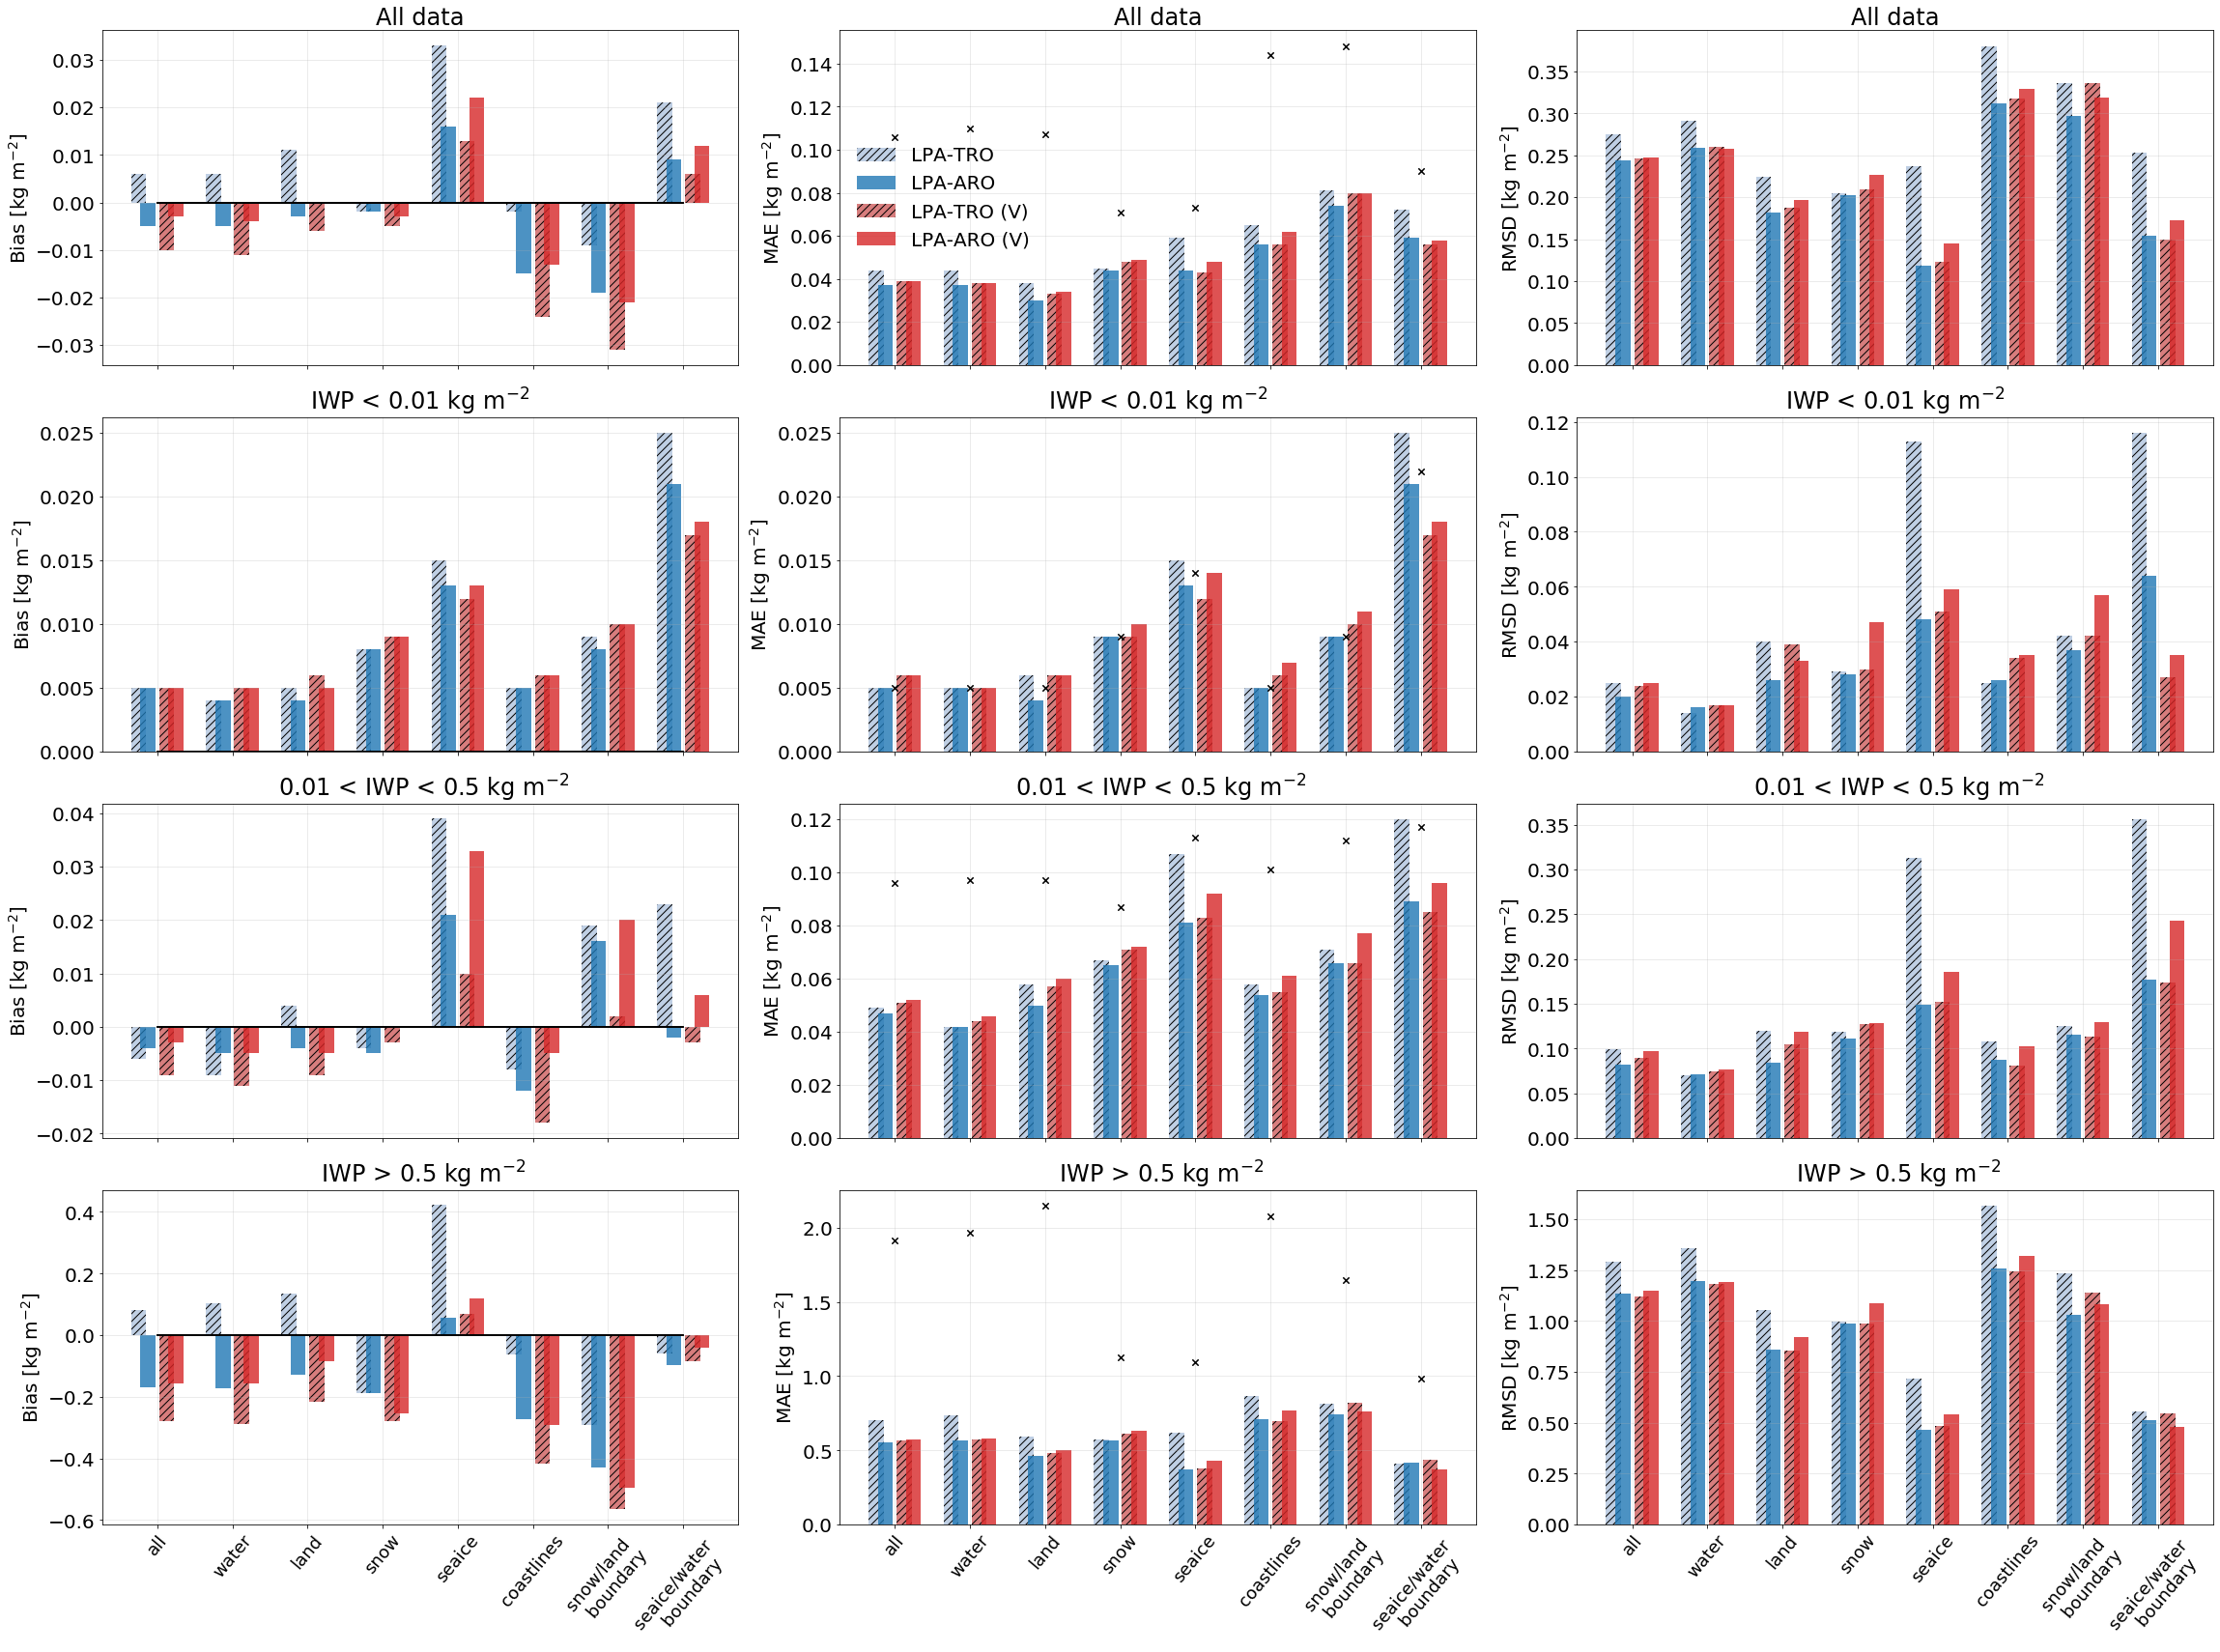

In [34]:
xx = np.arange(1, 9, 1)
fig, ax = plt.subplots(4, 3 , figsize = [32, 24])
ax = ax.ravel()


for i, var in enumerate(["Bias", "MAE", "RMSD"]):
    ax[i].bar(xx - 0.25, DF_TY[var], width = 0.20, color = "lightsteelblue",
              hatch = "///",alpha = 0.8, label = "LPA-TRO")
    ax[i].bar(xx - 0.125, DF_AY[var], width = 0.20, color = "tab:blue",  alpha = 0.8,
              label = "LPA-ARO")
    ax[i].bar(xx + 0.125, DF_TV[var], width = 0.20, color = "indianred", hatch = "///",
              alpha = 0.8, label = "LPA-TRO (V)")
    ax[i].bar(xx + 0.25, DF_AV[var], width = 0.20, color = "tab:red",  alpha = 0.8, 
              label = "LPA-ARO (V)")
    ax[1].plot(xx, DF_AY["Mean"], 'x', c = "k")
    #ax[i].set_xlabel("Subsets")
    ax[i].set_ylabel(var + r" [kg m$^{-2}$]")
    plt.tight_layout(pad = 0.5)
    ax[i].set_xticks(xx)
    ax[i].grid("on", alpha = 0.3)
    ax[i].set_title("All data")
    ax[0].plot(xx, yy, 'k')
    ax[i].set_xticklabels([])
    
    
for i, var in enumerate(["Bias", "MAE", "RMSD"]):
    i = i + 3
    ax[i].bar(xx - 0.25, DF_TY_3[var], width = 0.20, color = "lightsteelblue", hatch = "///",
              alpha = 0.8, label = "LPA-TRO")
    ax[i].bar(xx - 0.125, DF_AY_3[var], width = 0.20, color = "tab:blue", alpha = 0.8, 
              label = "LPA-ARO")
    ax[i].bar(xx + 0.125, DF_TV_3[var], width = 0.20, color = "indianred", hatch = "///",
              alpha = 0.8, label = "LPA-TRO (V)")
    ax[i].bar(xx + 0.25, DF_AV_3[var], width = 0.20, color = "tab:red", alpha = 0.8, 
              label = "LPA-ARO (V)")
    ax[4].plot(xx, DF_AY_3["Mean"], 'x', c = "k")
    #ax[i].set_xlabel("Subsets")
    ax[i].set_ylabel(var + r" [kg m$^{-2}$]")
    plt.tight_layout(pad = 0.5)
    ax[i].set_xticks(xx)
    ax[i].grid("on", alpha = 0.3)
    ax[i].set_title("IWP < 0.01 kg m$^{-2}$")
    ax[3].plot(xx, yy, 'k')
    ax[i].set_xticklabels([])
    
    
for i, var in enumerate(["Bias", "MAE", "RMSD"]):
    i = i + 6
    ax[i].bar(xx - 0.25, DF_TY_1[var], width = 0.20, color = "lightsteelblue", alpha = 0.8, 
              hatch = "///", label = "LPA-TRO")
    ax[i].bar(xx - 0.125, DF_AY_1[var], width = 0.20, color = "tab:blue", alpha = 0.8,
              label = "LPA-ARO")
    ax[i].bar(xx + 0.125, DF_TV_1[var], width = 0.20, color = "indianred", hatch = "///",
              alpha = 0.8, label = "LPA-TRO (V)")
    ax[i].bar(xx + 0.25, DF_AV_1[var], width = 0.20, color = "tab:red",  alpha = 0.8, 
              label = "LPA-ARO (V)")
    ax[7].plot(xx, DF_AY_1["Mean"], 'x', c = "k")
    #ax[i].set_xlabel("Subsets")
    ax[i].set_ylabel(var + r" [kg m$^{-2}$]")
    plt.tight_layout(pad = 0.5)
    ax[i].set_xticks(xx)
    ax[i].grid("on", alpha = 0.3)
    ax[i].set_title(r" 0.01 < IWP < 0.5 kg m$^{-2}$")
    ax[6].plot(xx, yy, 'k')
    ax[i].set_xticklabels([])
    
    
for i, var in enumerate(["Bias", "MAE", "RMSD"]):
    i = i+ 9
    ax[i].bar(xx - 0.25, DF_TY_2[var], width = 0.20, color = "lightsteelblue", hatch = "///",
              alpha = 0.8, label = "LPA-TRO")
    ax[i].bar(xx - 0.125, DF_AY_2[var], width = 0.20, color = "tab:blue", alpha = 0.8, 
              label = "LPA-ARO")
    ax[i].bar(xx + 0.125, DF_TV_2[var], width = 0.20, color = "indianred", alpha = 0.8, hatch = "///",
              label = "LPA-TRO (V)")
    ax[i].bar(xx + 0.25, DF_AV_2[var], width = 0.20, color = "tab:red", alpha = 0.8,
              label = "LPA-ARO (V)")
    ax[10].plot(xx, DF_AY_2["Mean"], 'x', c = "k")
    #ax[i].set_xlabel("Subsets")
    ax[i].set_ylabel(var + r" [kg m$^{-2}$]")
    plt.tight_layout(pad = 0.5)
    ax[i].set_xticks(xx)
    ax[i].grid("on", alpha = 0.3)  
    ax[i].set_title(r" IWP > 0.5 kg m$^{-2}$") 
    ax[9].plot(xx, yy, 'k')
    
    

    ax[9].set_xticklabels(["all","water", "land", "snow", "seaice", "coastlines", "snow/land \n boundary",
                           "seaice/water \n boundary"], rotation = 50)
    ax[10].set_xticklabels(["all","water", "land", "snow", "seaice", "coastlines", "snow/land \n boundary",
                           "seaice/water \n boundary"], rotation = 50)   
    ax[11].set_xticklabels(["all","water", "land", "snow", "seaice", "coastlines", "snow/land \n boundary",
                           "seaice/water \n boundary"], rotation = 50)
    ax[i].tick_params(axis='x', labelsize=18)
ax[1].legend(loc = "center left", frameon = False)

xx == np.arange(-1, 11, 1)
yy = np.zeros([xx.size])
ax[0].plot(xx, yy, 'k')
#ax[1].set_ylim([0, 0.1])
#fig.suptitle("All data")


fig.savefig("ARO_TRO_v_vh.pdf", bbox_inches = "tight")
#fig.suptitle("IWP < 0.1 kg/m2")
#fig.savefig("ARO_lpa_clear.pdf", bbox_inches = "tight")

### Fig. 11 of manuscript

ValueError: x and y must have same first dimension, but have shapes (4,) and (8,)

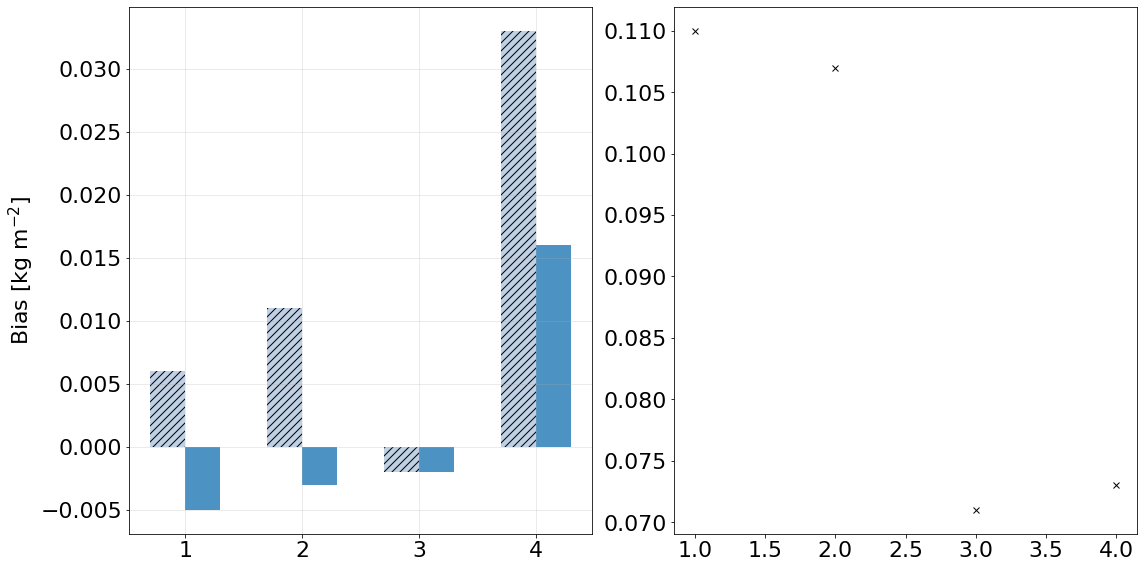

In [52]:
plt.rcParams.update({'font.size': 22})
counts = [stype.size]
for i in [0, 1, 2, 3, 4, 6, 7]:
    mask = stype == i
    counts.append(np.sum(mask))
 
counts = np.array(counts)

xx = np.arange(1, 5, 1)
fig, ax = plt.subplots(1, 2 , figsize = [16, 8])
ax = ax.ravel()


for i, var in enumerate(["Bias", "MAE"]):
    ax[i].bar(xx - 0.15, DF_TY[1:5][var], width = 0.30, color = "lightsteelblue",
              hatch = "///",alpha = 0.8, label = "LPA-TRO")
    ax[i].bar(xx + 0.15, DF_AY[1:5][var], width = 0.30, color = "tab:blue",  alpha = 0.8,
              label = "LPA-aARO")
    #ax[i].bar(xx + 0.125, DF_TV[var], width = 0.20, color = "indianred", hatch = "///",
    #          alpha = 0.8, label = "LPA-TRO (V)")
    #ax[i].bar(xx + 0.25, DF_AV[var], width = 0.20, color = "tab:red",  alpha = 0.8, 
    #          label = "LPA-ARO (V)")
    ax[1].plot(xx, DF_AY[1:5]["Mean"], 'x', c = "k")
    #ax[i].set_xlabel("Subsets")
    ax[i].set_ylabel(var + r" [kg m$^{-2}$]")
    plt.tight_layout(pad = 0.5)
    ax[i].set_xticks(xx)
    ax[i].grid("on", alpha = 0.3)
    #ax[i].set_title("All data")
    ax[0].plot(xx, yy, 'k')
    ax[i].set_xticklabels([])

#ax[2].bar(xx, 100 * counts/counts[0], width = 0.20, color = "lightsteelblue")    
#ax[2].set_xticks(xx)    
#ax[2].grid("on", alpha = 0.3)

ax[0].legend(loc = "upper left", frameon = False)

xx == np.arange(-1, 4, 1)
yy = np.zeros([xx.size])
ax[0].plot(xx, yy, 'k')
#ax[1].set_ylim([0, 0.1])
#fig.suptitle("All data")

for i in range(2):
    ax[i].set_xticklabels(["water", "land", "snow-cover", "sea ice", ])
    #"coastlines", "snow/land \n boundary",
    #                       "seaice/water \n boundary"], rotation = 50)

ax[0].text(0.5, 0.036, "a)")
ax[1].text(0.5, 0.118, "b)")
fig.savefig("ARO_TRO_v_vh_all.pdf", bbox_inches = "tight")
#fig.suptitle("IWP < 0.1 kg/m2")
#fig.savefig("ARO_lpa_clear.pdf", bbox_inches = "tight")

In [ ]:
counts

In [ ]:
xx

In [ ]:
lpa_data      = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jan_lpa.nc"), 
                             inputs, 
                             outputs,
                             batch_size = batchSize,
                             latlims = latlims,)
                             #log_iwp = xlog)
    
pr1_data      = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jan_lpa_pr1.nc"), 
                             inputs, 
                             outputs,
                             batch_size = batchSize,
                             latlims = latlims,)
                             #log_iwp = xlog)    

In [ ]:
lpa_data      = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jan_lpa.nc"), 
                             inputs, 
                             outputs,
                             batch_size = batchSize,
                             latlims = latlims,)
                             #log_iwp = xlog)
    
pr1_data      = gmiData(os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jan_lpa_pr1.nc"), 
                             inputs, 
                             outputs,
                             batch_size = batchSize,
                             latlims = latlims,)
                             #log_iwp = xlog)    

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = [16, 8])

ax = ax.ravel()


lsm = np.argmax(pr1_data.stype, axis = 1)
tb  = pr1_data.add_noise(pr1_data.x[:, :4], [0, 1, 2, 3])
mask = (lsm == 0) 

lsm1 = np.argmax(lpa_data.stype, axis = 1)
tb1  = lpa_data.add_noise(lpa_data.x[:, :4], [0, 1, 2, 3])
mask1 = (lsm == 0) 

ax[0].scatter(tb[mask, 0], pr1_data.y.ravel()[mask], c = "k", s = 3, label = "TRO")
ax[1].scatter(tb1[mask1, 1], lpa_data.y.ravel()[mask1],c = "r", s = 3, label = "ARO")


ax[1].scatter(tb[mask, 1], pr1_data.y.ravel()[mask], c= "k", s = 3, label = "TRO")
ax[0].scatter(tb1[mask1, 0], lpa_data.y.ravel()[mask1],
              c ='r', s = 3, label = "ARO")


for i in range(2):
    ax[i].legend()
    #ax[1].legend()
    ax[0].set_xlabel("TB 166V GHz [K]")
    ax[1].set_xlabel("TB 166H GHz [K]")
    ax[0].set_ylabel(r"IWP [kg m$^{-2}$]")
    ax[i].grid("on", alpha = 0.3)
fig.savefig("IWP_TB_relationship_VH.png", bbox_inches = "tight")

In [ ]:
tbbins = np.arange(100, 300, 10)
tbbins_c = (tbbins[1:] + tbbins[:-1])/2

def get_mean_iwp(t, tbbins, iwp):
    
    itb = np.digitize(t, tbbins)
    imean = np.bincount(itb, iwp)/np.bincount(itb)
    
    return imean


imean_v = get_mean_iwp(tb1[:, 0], tbbins, lpa_data.y.ravel())
imean_h = get_mean_iwp(tb1[:, 1], tbbins, lpa_data.y.ravel())
imean_v1 = get_mean_iwp(tb[:, 0], tbbins, pr1_data.y.ravel())
imean_h1 = get_mean_iwp(tb[:, 1], tbbins, pr1_data.y.ravel())




fig, ax = plt.subplots(1, 1, figsize = [6, 6])
ax.plot(tbbins, imean_v[1:], 'r', label = "ARO V")
ax.plot(tbbins, imean_v1[1:], 'r--', label  = "TRO V")
ax.plot(tbbins, imean_h[1:], 'k', label = "ARO H")
ax.plot(tbbins, imean_h1[1:], 'k--', label  = "TRO H")
ax.legend()
ax.grid("on", alpha = 0.3)
ax.set_ylim([1e-4, 17.5])
ax.set_xlim([90, 220])

#ax.set_yscale("log")
ax.set_xlabel("TB [K]")
ax.set_ylabel(r"IWP [kg m$^{-2}$]")
fig.savefig("TB_IWP.pdf", bbox_inches = "tight")

In [ ]:
tbbins_c.shape

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = [16, 8])

ax = ax.ravel()


lsm = np.argmax(pr1_data.stype, axis = 1)
tb  = pr1_data.add_noise(pr1_data.x[:, :4], [0, 1, 2, 3])
mask = (lsm == 0) 

lsm1 = np.argmax(lpa_data.stype, axis = 1)
tb1  = lpa_data.add_noise(lpa_data.x[:, :4], [0, 1, 2, 3])
mask1 = (lsm == 0) 

ax[0].scatter(tb[mask, 0] - tb[mask, 1], pr1_data.y.ravel()[mask], c = "k", s = 3, label = "TRO")
ax[1].scatter(tb1[mask1, 0] - tb1[mask1, 1], lpa_data.y.ravel()[mask1],c = "r", s = 3, label = "ARO")


ax[1].scatter(tb[mask, 0] - tb[mask, 1], pr1_data.y.ravel()[mask], c= "k", s = 3, label = "TRO")
ax[0].scatter(tb1[mask1, 0]- tb1[mask1, 1], lpa_data.y.ravel()[mask1],c = "r", s = 3, label = "ARO")


for i in range(2):
    ax[i].legend()
    #ax[1].legend()
    ax[0].set_xlabel("TB 166V GHz [K]")
    ax[1].set_xlabel("TB 166H GHz [K]")
    ax[0].set_ylabel(r"IWP [kg m$^{-2}$]")
    ax[i].grid("on", alpha = 0.3)
fig.savefig("IWP_PD_relationship_VH.png", bbox_inches = "tight")

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = [12, 6])
ax = ax.ravel()
mask = stype.ravel() == 0
ax[0].scatter( TB[:, 2][mask],  AY.ravel()[mask], s = 2, c = "k")
#ax[0].scatter( TB[:, 0][mask],  TY_mean.ravel()[mask], color = "r", s = 2)
cs = ax[0].scatter( TB[:, 2][mask],  TY_mean.ravel()[mask], s = 2, 
             c = "r")

#cs = ax[1].scatter( TB[:, 0][mask],  AY.ravel()[mask], c = TB[:, 0][mask] - TB[:, 1][mask], 
#              s = 2, vmin = 1, vmax = 30, cmap = cm.tab20c)



ax[0].grid("on", alpha = 0.2)
ax[1].grid("on", alpha = 0.2)
fig.colorbar(cs, ax = ax)   
#ax.set_xscale("log")

In [ ]:
test_data.wvp.ravel()[mask].max()

In [ ]:
def mfe( y0, y):
    return np.median(10**(np.abs(np.log10(y/y0))) - 1) * 100

def calculate_mfe(y0, y):
    nbins = 60
    logbins = np.log10(np.logspace(np.log10(1e-4), np.log10(1e2), nbins))
    ibins = np.digitize(np.log10(y0), logbins)
    err = []
    for ix in range(nbins):

        ix = np.where(ibins == ix)[0]

        err.append(mfe(y0[ix], y[ix]))
    return err, logbins

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = [8, 8])
fig.tight_layout(pad=1.0)   

err, logbins  = calculate_mfe(AY, AY_mean)
err1, _ = calculate_mfe(TY, TY_mean)

err2, logbins  = calculate_mfe(AV, AV_mean)
err3, _ = calculate_mfe(TV, TV_mean)

ax.plot(10 ** (logbins[1:]), err[1:], '-', label = "LPA-ARO")
ax.plot(10 **(logbins[1:]), err1[1:], '-', label = "LPA-TRO")

ax.plot(10 ** (logbins[1:]), err2[1:], '-', label = "LPA-ARO (V)")
ax.plot(10 **(logbins[1:]), err3[1:], '-', label = "LPA-TRO (V)")

ax.set_ylim([0, 500])
ax.set_xscale("log")
#ax.set_title()
ax.set_xlabel(r" IWP [kg m$^{-2}$] ")
ax.set_ylabel("Median fractional error [%]")
ax.legend()
ax.grid('on')
fig.savefig("median_fractional_error.png", bbox_inches = "tight")

In [ ]:
def stats_snow(Y_mean, Y, stype, lat):
    statistics_aro = np.zeros([2, 4])
    # snow/seaice
    #amask = (stype == 2) | (stype == 3) 
    amask = (stype == 2) & (lat > 45)
    statistics_aro[0, :] = stats(Y_mean[amask], Y[amask])

    # snow 
    amask = (stype == 7) & (lat > 45) 
    statistics_aro[1, :] = stats(Y_mean[amask], Y[amask])
    
    DF_aro = pd.DataFrame(statistics_aro, columns = ["Bias", "MAE", "STD", "Mean"], 
                  index = ["snow","land/snow"])
    return DF_aro

In [ ]:
snow_AY = stats_snow(AY_mean, AY, stype, lat)
snow_TY   = stats_snow(TY_mean, TY, stype, lat)
snow_AV  = stats_snow(AV_mean, AV, stype, lat)
snow_TV  = stats_snow(TV_mean, TV, stype, lat)

iwpmask = AY < 0.1
snow_all_1 = stats_snow(AY_mean[iwpmask], AY[iwpmask], stype[iwpmask], lat[iwpmask])
snow_V_1   = stats_snow(V_mean[iwpmask], AY[iwpmask], stype[iwpmask], lat[iwpmask])
snow_VH_1  = stats_snow(VH_mean[iwpmask], AY[iwpmask], stype[iwpmask], lat[iwpmask])

iwpmask = AY > 0.1
snow_all_2 = stats_snow(AY_mean[iwpmask], AY[iwpmask], stype[iwpmask], lat[iwpmask])
snow_V_2   = stats_snow(V_mean[iwpmask], AY[iwpmask], stype[iwpmask], lat[iwpmask])
snow_VH_2  = stats_snow(VH_mean[iwpmask], AY[iwpmask], stype[iwpmask], lat[iwpmask])


In [ ]:
snow_all_1

In [ ]:
snow_V_1

In [ ]:
snow_VH_1

In [ ]:
sland_all = stats_snow(AY_mean, AY, stype, lat, a = 7)
sland_V   = stats_snow(V_mean, AY, stype, lat, a = 7)
sland_VH  = stats_snow(VH_mean, AY, stype, lat, a = 7)

In [ ]:
plt.rcParams.update({'font.size': 16})
xx = np.arange(1, 3, 1)
fig, ax = plt.subplots(1, 3, figsize = [12, 4])
ax = ax.ravel()

var = "Bias"
i = 0
ax[i].bar(xx - 0.1, snow_all[var], width = 0.05, color = "tab:blue", alpha = 0.8, label = "LPA ARO (VH)")
ax[i].bar(xx , snow_V[var], width = 0.05, color = "tab:red", alpha = 0.8, label = "LPA ARO (V)")
ax[i].bar(xx + 0.1, snow_VH[var], width = 0.05, color = "tab:green", alpha = 0.8, label = "LPA ARO (VH/2)")
#ax[i].set_xlabel("Subsets")
#ax[1].plot(xx, snow_all["Mean"], 'x', c = "k")
ax[i].set_ylabel(var + r" [kg m$^{-2}$]")
plt.tight_layout(pad = 0.5)
ax[i].set_xticks(xx)
ax[i].set_xticklabels(["snow","land/snow"], rotation = 50)
ax[i].tick_params(axis='x', labelsize=12)
ax[i].grid("on")   
ax[i].set_title("All")

i = 1
ax[i].bar(xx - 0.1, snow_all_1[var], width = 0.05, color = "tab:blue", alpha = 0.8, label = "LPA ARO (VH)")
ax[i].bar(xx , snow_V_1[var], width = 0.05, color = "tab:red", alpha = 0.8, label = "LPA ARO (V)")
ax[i].bar(xx + 0.1, snow_VH_1[var], width = 0.05, color = "tab:green", alpha = 0.8, label = "LPA ARO (VH/2)")
#ax[i].set_xlabel("Subsets")
#ax[1].plot(xx, snow_all["Mean"], 'x', c = "k")
ax[i].set_ylabel(var + r" [kg m$^{-2}$]")
plt.tight_layout(pad = 0.5)
ax[i].set_xticks(xx)
ax[i].set_xticklabels(["snow","land/snow"], rotation = 50)
ax[i].tick_params(axis='x', labelsize=12)
ax[i].grid("on")
ax[i].set_title("IWP < 0.1 kg/m2")

i = 2
ax[i].bar(xx - 0.1, snow_all_2[var], width = 0.05, color = "tab:blue", alpha = 0.8, label = "LPA ARO (VH)")
ax[i].bar(xx , snow_V_2[var], width = 0.05, color = "tab:red", alpha = 0.8, label = "LPA ARO (V)")
ax[i].bar(xx + 0.1, snow_VH_2[var], width = 0.05, color = "tab:green", alpha = 0.8, label = "LPA ARO (VH/2)")
#ax[i].set_xlabel("Subsets")
#ax[1].plot(xx, snow_all["Mean"], 'x', c = "k")
ax[i].set_ylabel(var + r" [kg m$^{-2}$]")
plt.tight_layout(pad = 0.5)
ax[i].set_xticks(xx)
ax[i].set_xticklabels(["snow","land/snow"], rotation = 50)
ax[i].tick_params(axis='x', labelsize=12)
ax[i].grid("on")    
ax[0].legend(prop={'size': 12})
yy = np.zeros(xx.shape)
ax[0].plot(xx, yy, 'k--')
ax[i].set_title("IWP > 0.1 kg/m2")
fig.savefig("snow_lpa.pdf", bbox_inches = "tight")

In [ ]:
amask = (stype == 2) & (TB[:, 0, :] > 250) & (TB[:, 0, :] < 275) & (AY < 0.1)
fig, ax = plt.subplots(1, 1, figsize = [6, 6])
ax.scatter(AY_mean[amask], V_mean[amask])

x = np.arange(0, 4)
ax.plot(x, x, 'k')
ax.set_xlim([0.0001, 5])
ax.set_ylim([0.0001, 5])
ax.set_yscale('log')
ax.set_xscale("log")
np.mean(VH_mean[amask])

In [ ]:
def plot_stats(amask1, fig, ax, c, offset, labels, figname = "statistics.png"):
    statistics_aro = np.zeros([prbins.size - 1, 3])
    statistics_tro = np.zeros([prbins.size - 1, 3])
    npr            = np.zeros([prbins.size - 1])
    for i in range(1, prbins.size):
        amask = ipr == i
        amask = np.logical_and(amask, amask1)
        statistics_aro[i-1, :] = stats(AY_mean[amask], AY[amask])
        statistics_tro[i-1, :] = stats(TY_mean[amask], TY[amask])
        npr[i-1]               = np.sum(amask)

    DF_tro = pd.DataFrame(statistics_tro, columns = ["Bias", "MAE", "RMSD"], 
                      index = prcenter)
    DF_aro = pd.DataFrame(statistics_aro, columns = ["Bias", "MAE", "RMSD"], 
                      index = prcenter)


    ax = ax.ravel()

    for i, key in enumerate(["Bias", "MAE", "RMSD" ]):

        ax[i].plot(DF_tro[key], "-o", color = c, label = labels[0])
        ax[i].plot(DF_aro[key], "--o", color = c, label = labels[1])
        ax[i].legend()
        ax[i].set_ylabel(key + " [kg/m2]")
        ax[i].set_xlabel("pratio-gmi")

        plt.tight_layout(pad = 0.5)
    ax[3].bar(prcenter + offset, npr, width = 0.02 , color = c)  
    ax[3].set_xlabel("pratio-gmi")
    ax[3].set_ylabel("counts")
  

In [ ]:
prbins   = np.arange(1, 1.4, 0.06)
prcenter = (prbins[1:] + prbins[:-1]) * 0.5

ipr   = np.digitize(PR, prbins)
npr   = np.zeros([prbins.size])


fig, ax = plt.subplots(1, 4, figsize = [24, 8])

amask1 = stype > -1

colors = ["#e41a1c", "#377eb8", "#4daf4a"]

#984ea3
#ff7f00
#ffff33
#a65628
#f781bf]
plot_stats(amask1, fig, ax ,c = colors[0], offset = -0.01, labels = ["tro_all", "aro_all"],
           figname = "statistics_all.png")


amask1 = stype == 0
plot_stats(amask1, fig, ax, c = colors[1], offset = 0, labels = ["tro_water", "aro_water"],
           figname = "statistics_water.png")

amask1 = stype == 1
plot_stats(amask1, fig, ax, c = colors[2], offset = 0.01, labels = ["tro_land", "aro_land"],
           figname = "statistics_land.png")


ax[3].legend(["all", "water", "land"])
fig.savefig("statistics_surfacetype.png", bbox_inches = "tight")  

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = [24, 8])
amask1 = np.abs(lat) <= 30.0
plot_stats(amask1, fig, ax,  c = colors[0], offset = -0.01, labels = [r"tro 0$^{\circ}$ - 30$^{\circ}$",
                                             r"aro 0$^{\circ}$ - 30$^{\circ}$"
                                            ])


amask1 = (np.abs(lat) > 30) & (np.abs(lat) <= 45)
plot_stats(amask1, fig, ax,  c = colors[1], offset = 0, labels = [r"tro 30$^{\circ}$ - 45$^{\circ}$",
                                             r"aro 30$^{\circ}$ - 45$^{\circ}$"
                                            ])

amask1 = (np.abs(lat) > 45) 
plot_stats(amask1, fig, ax, c = colors[2], offset = 0.01, labels = [r"tro 45$^{\circ}$ - 65$^{\circ}$",
                                             r"aro 45$^{\circ}$ - 65$^{\circ}$"
                                            ])

ax[3].legend([r"0$^{\circ}$ - 30$^{\circ}$", 
              r"30$^{\circ}$ - 45$^{\circ}$",
              r"45$^{\circ}$ - 65$^{\circ}$"])
fig.savefig("statistics_latitudes.png", bbox_inches = "tight")

In [ ]:
def three_sigma(tb):
    """
    three sigma rule to classify cloudy and clear-sky tb
    

    Parameters
    ----------
    tb : 183+-3 GHz 

    Returns
    -------
    mask : scalar, the threshold value
    """
    bins = np.arange(100, 310, 1)
    hist = np.histogram(tb, bins, density = True)


    mids = 0.5*(bins[1:] + bins[:-1])

    tbmean = np.sum(hist[0] * mids)

    sd  = np.sqrt(np.sum(hist[0] * (mids - tbmean)**2))

    tbmax = mids[np.argmax(hist[0])]
    
    mask = tbmax-3*sd

    return mask

In [ ]:
tbt    = three_sigma(tb)
amask1 = tb[:, 3] < tbt
amask1 = np.repeat(amask1.reshape(-1, 1), 4, axis = 1)

fig, ax = plt.subplots(1, 4, figsize = [24, 8])
plot_stats(amask1, fig, ax, c = colors[0], labels = ["tro_cloudy", "aro_cloudy"], offset = -0.01)

amask1 = tb[:, 3] > tbt

amask1 = np.repeat(amask1.reshape(-1, 1), 4, axis = 1)

plot_stats(amask1, fig, ax, c = colors[1], labels = ["tro_clear", "aro_clear"], offset = 0,)

ax[3].legend(["cloudy", "clear"])
ax[3].set_yscale("log")
ax[1].set_yscale("log")
ax[2].set_yscale("log")
fig.savefig("statistics_cloudyclear.png", bbox_inches = "tight")

In [ ]:
tbt

In [ ]:
def PDF_uncertainty_bins(y_pre, y0, ulim):
    dtb =(y_pre[:, imedian] - y0)
    uncertain = y_pre[:, -13] - y_pre[:, 12]

    
    im = uncertain <= ulim[0]
    print (np.sum(im), uncertain.max(), uncertain.min())
    bins = np.arange(-12.5, 15., 0.8)
    hist0 = np.histogram(dtb[im], bins, density = True)
    
    
    im = np.logical_and((uncertain < ulim[1]), ( uncertain >= ulim[0]) )
    hist1 = np.histogram(dtb[im], bins, density = True)
 
  
    im = uncertain >=ulim[1]
    hist2 = np.histogram(dtb[im], bins, density = True)
    
    
    return hist0[0], hist1[0],  hist2[0], bins

def count_true_events(y_pre, y0, ulim):
    
    dtb =(y_pre[:, 3] - y0)
    uncertain = y_pre[:, 5] - y_pre[:, 1]
 #I1V
    #ulim = [3, 4] #I2V
    #ulim = [1, 1.5 ]#I3V
    
    im = uncertain <= ulim[0]
    
    mask = np.logical_and(y0[im] >= y_pre[im, 1],  y0[im] <= y_pre[im, 5])
    icount1 = np.sum(mask)
    icount1 = icount1/np.sum(im) * 100
    
    
    im = np.logical_and((uncertain < ulim[1]), ( uncertain >= ulim[0]) )
    mask = np.logical_and(y0[im] >= y_pre[im, 1],  y0[im] <= y_pre[im, 5])
    icount2 = np.sum(mask)
    icount2 = icount2/np.sum(im) * 100
    
 
  
    im = uncertain >=ulim[1]
    mask = np.logical_and(y0[im] >= y_pre[im, 1],  y0[im] <= y_pre[im, 5])
    icount3 = np.sum(mask)
    icount3 = icount3/np.sum(im) * 100
    
    return np.round(icount1, 1), np.around(icount2, 1), np.round(icount3,1)
    

In [ ]:
def sharpness(y, mask = None):
    if mask is not None:
        s = np.mean((y[mask, -2] - y[mask, 1])/y[mask, imedian])
    else:
        s = np.mean((y[:, -2] - y[:, 1])/y[:, imedian])        
    return s

In [ ]:
sharpness(AY_pre, amask)

In [ ]:
sharpness(ty_pre, amask)

In [ ]:
def calibration(y_pre, y):
    n_intervals = len(quantiles)//2
    qs = quantiles
    total = 0.0
    intervals = np.array([q_r - q_l for (q_l, q_r) in zip(qs, reversed(qs))])[:n_intervals]
    counts = np.zeros(n_intervals)
    
    for i in range(n_intervals):
        l = y_pre[:, i]
        r = y_pre[:, -(i + 1)]
        counts[i] += np.logical_and(y >= l, y < r).sum()

    total += np.prod(y.size)

    return intervals[::-1], (counts / total)[::-1]


In [ ]:
amask = stype == 0
amask1 = np.abs(lat) <= 30.0

amask = np.logical_and(amask, amask1)

In [ ]:
def aic(y_pre, y, iupper, ilower, interval):
    upper      = y_pre[:, iupper]
    lower      = y_pre[:, ilower]
    alpha      = 1 - interval/100

    truevalues = y
    I1         = np.where(truevalues < lower, 1, 0)
    I2         = np.where(truevalues > upper, 1, 0)
    
    score      = (upper - lower) + 2/alpha * (lower - truevalues) * I1 + 2/alpha * (truevalues - upper) * I2
    
    return np.mean(score)


In [ ]:
amask = stype == 0
amask1 = np.abs(lat) <= 30.0

amask = np.logical_and(amask, amask1)

In [ ]:
ay_pre = AY_pre.reshape(-1, 50)
ty_pre = TY_pre.reshape(-1, 50)
ay     = AY.ravel()
ty     = TY.ravel()
mask   = amask.ravel()


In [ ]:
ascores = []
tscores = []
ascores_all = []
tscores_all = []
intervals = []
for i in range(25):
    ilower = i
    iupper = -1 - i
    interval = (quantiles[iupper] - quantiles[ilower]) * 100
    
    intervals.append(interval)
    
    ascores.append(aic(ay_pre[mask, :], ay[mask], iupper, ilower, interval))
    tscores.append(aic(ty_pre[mask, :], ty[mask], iupper, ilower, interval))
    ascores_all.append(aic(ay_pre, ay, iupper, ilower, interval))
    tscores_all.append(aic(ty_pre, ty, iupper, ilower, interval))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = [6, 6])
ax.plot(intervals, ascores_all, "--", label = "aro", color = "tab:blue")
ax.plot(intervals, tscores_all, "-", label = "tro", color = "tab:blue")
ax.plot(intervals, ascores, "--", label = "aro subset", color = "tab:red")
ax.plot(intervals, tscores, "-", label = "tro subset", color = "tab:red")
ax.legend()
ax.set_xlabel("interval range [%]")
ax.set_ylabel("average interval score")
ax.legend()
ax.set_xlabel("interval range [%]")
ax.set_ylabel("average interval score")
#ax.set_title("All data")
ax.set_title("water + tropics")
plt.tight_layout(pad = 0.5)
fig.savefig("AIS.png", bbox_inches = "tight", dpi = 300)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = [6, 6])


inter, fre = calibration(ay_pre, ay )

ax.plot(inter, fre, label = "ARO")

inter, fre = calibration(ty_pre, ty )

ax.plot(inter, fre, label = "TRO")

inter, fre = calibration(ay_pre[mask, :], ay[mask] )

ax.plot(inter, fre, label = "ARO subset")

inter, fre = calibration(ty_pre[mask, :], ty[mask] )

ax.plot(inter, fre, label = "TRO subset")

ax.legend()
y = np.arange(0, 1.2, 0.2)
x = y

ax.plot(x, y, "k--")
ax.set_xlabel("Observed")
ax.set_ylabel("Predicted")
fig.savefig("calibration.png", bbox_inches = "tight", dpi = 300)

In [ ]:
def zonal_mean(lat, iwp, latbins):
    

    bins     = np.digitize(lat, latbins)
    
    nbins    = np.bincount(bins)
    iwp_mean = np.bincount(bins, iwp)
    
    return iwp_mean, nbins

In [ ]:
latbins = np.arange(-65, 65, 1.5)

iwp_tro, counts_t = zonal_mean(lat.ravel(), TY_mean.ravel(), latbins)
iwp_aro, counts_a = zonal_mean(lat.ravel(), AY_mean.ravel(), latbins)



In [ ]:
fig, ax = plt.subplots(1, 1, figsize = [5, 8])
ax.plot( iwp_tro[1:]/counts_t[1:], latbins, "-", color = "tab:blue", label = "tro")
ax.plot( iwp_aro[1:]/counts_a[1:], latbins, "--",color = "tab:blue", label = "aro")
ax.legend()
ax.set_xlabel(r"IWP [kg m$^{-2}$]")
ax.set_ylabel("Latitude")

In [ ]:
iwp_aro

In [ ]:
latbins.shape